In [1]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

from src.Data_handler import Data_handler
from src.PlotGenerator import PlotGenerator
from src.utils.Utils import Utils

mortes_violentas_csv_path = os.path.join('../datas', 'mortes-violentas.csv' )
indice_gini_csv_path = os.path.join('../datas', 'ipeadata[05-06-2025-04-16].csv' )

dh_mv = Data_handler(mortes_violentas_csv_path)
dh_gini = Data_handler(indice_gini_csv_path)

df_mv = dh_mv.load_csv()
df_gini = dh_gini.load_csv(skiprows=1)

df_mv = dh_mv.clean_data()
df_gini = dh_gini.clean_data()

for i in range(2012, 2023):
    df_gini[str(i)] = df_gini[str(i)].str.replace(',', '.').astype(float)

df_gini_long = dh_gini.gini_df_to_long(df=df_gini)
df_gini_long = df_gini_long.rename(columns={'Sigla': 'UF', 'Ano': 'ano'})

df_mv_filtrado = df_mv[(df_mv['periodo'] >= 2012) & (df_mv['periodo'] <= 2022)]
df_mv_filtrado = df_mv_filtrado.rename(columns={'nome': 'UF', 'periodo': 'ano'})

utils = Utils()
utils.column_type_converter(df=df_mv_filtrado, column_name='ano', type=int)
utils.column_type_converter(df=df_mv_filtrado, column_name='valor', type=int)

utils.column_type_converter(df=df_gini_long, column_name='ano', type=int)

In [2]:


print(df_mv_filtrado.dtypes )

print(df_gini_long.dtypes)

cod       int64
UF       object
ano       int64
valor     int64
dtype: object
UF          object
CÃ³digo      int64
Estado      object
ano          int64
Gini       float64
dtype: object


In [3]:
df_combineb = utils.merge_dataframes(df_gini=df_gini_long, df_mv=df_mv_filtrado)
print(df_combineb)

     UF   ano   Gini  valor
0    AC  2012  0.566    531
1    AC  2012  0.566    531
2    AL  2012  0.503   3367
3    AL  2012  0.503   3367
4    AM  2012  0.589   2678
..   ..   ...    ...    ...
508  RS  2022  0.467   7910
509  SC  2022  0.419   4762
510  SE  2022  0.528   1922
511  SP  2022  0.500  24332
512  TO  2022  0.507   1516

[513 rows x 4 columns]


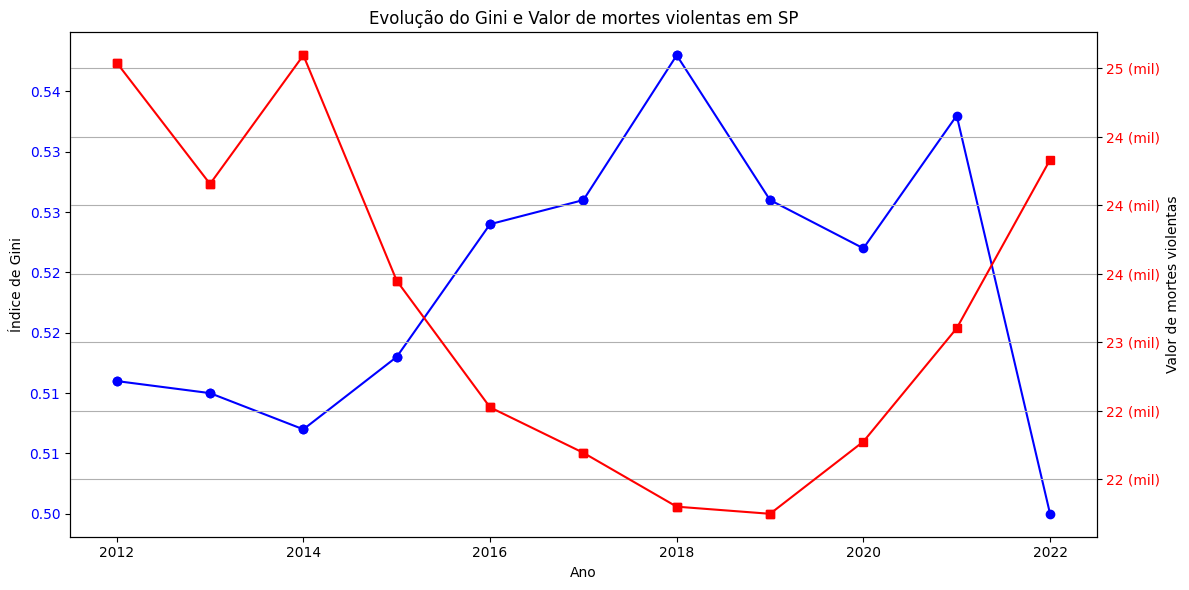

In [4]:
plot_df_combined = PlotGenerator(df_combineb)
plot_df_combined.ratio_over_time_by_state('SP')